<a href="https://colab.research.google.com/github/swapnalishamrao/Internship_task/blob/main/Titanic_Survival_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <font size='8px'><font color='#3792cb'><u>**Titanic_Survival_Prediction_Classification**

# **Project Summary -**

The Titanic Survival Prediction Classification Project is a data-driven endeavor that employs machine learning techniques to determine the likelihood of passengers' survival on the ill-fated RMS Titanic. This project falls under the category of binary classification, where the primary objective is to classify passengers into two distinct categories: "Survived" and "Did Not Survive."

To initiate this project, historical data pertaining to the Titanic's passengers must first be collected. This dataset typically comprises a plethora of information, including passenger names, ages, genders, ticket classes, cabin allocations, and the ultimate survival status of each individual.

The next critical step in this project involves data preprocessing. It is essential to clean and refine the dataset to ensure its suitability for machine learning. This often entails addressing missing values, encoding categorical variables, and normalizing or scaling numeric attributes.

Following data preprocessing, exploratory data analysis (EDA) is conducted to gain valuable insights into the dataset. Visualization techniques and statistical analyses are deployed to unveil relationships between various features and survival rates.

Feature selection is a crucial aspect of the project, where the most pertinent features for survival prediction are identified. Techniques such as correlation analysis and feature importance ranking are commonly employed to facilitate this process.

Once the dataset is primed, the appropriate machine learning algorithms for classification must be chosen. Common choices include logistic regression, decision trees, random forests, support vector machines, and neural networks.

The subsequent phases encompass model training and evaluation. The dataset is divided into training and testing sets, with the chosen algorithms applied to the training data. Hyperparameters are fine-tuned, and model performance is assessed using metrics such as accuracy, precision, recall, F1-score, and ROC AUC. Cross-validation techniques help gauge model generalization.

Interpreting the trained models is equally important. This phase aims to elucidate which factors wield the most influence in predicting survival. Feature importance plots and SHAP values often prove instrumental in this endeavor.

If applicable, the selected model can be deployed in a production environment to make predictions on new data. Finally, the project culminates in a comprehensive report or presentation that encapsulates the entire journey, from data preprocessing and model selection to results and insights gleaned.

In conclusion, the Titanic Survival Prediction Classification Project is an exemplary use case of machine learning in a real-world context. It underscores the significance of data preprocessing, feature engineering, and model selection in solving classification problems. Ultimately, the goal is to create a robust model capable of predicting passenger survival aboard the Titanic based on historical data, with the potential for future refinements and expansions.

# **GitHub Link -**

[GitHub Link](https://github.com/swapnalishamrao/)

# **Problem Statement**

Titanic Survival Prediction Classification Project is to develop a machine learning model that can accurately predict whether a passenger aboard the RMS Titanic survived or not based on a set of features and historical data. This binary classification task aims to analyze and utilize passenger information such as names, ages, genders, ticket classes, and cabin assignments to determine their likelihood of survival during the tragic sinking of the Titanic. The objective is to build a reliable predictive model that can assist in understanding the factors that influenced survival rates on the Titanic and potentially provide insights into passenger demographics and circumstances associated with a higher chance of survival.

# ***Let's Begin !***

## ***1. Know Your Data***

## **Importing Library and connecting drive**

In [1]:
## Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For pretty-printing tabular data
from tabulate import tabulate

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For Split dataset into train and test
from sklearn.model_selection import train_test_split

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithams for building model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# For plotting Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# For building Artificial Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

!pip install shap
# For model explainability
import shap

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
train = pd.read_csv('/content/drive/MyDrive/train (3).csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Dataset First View**

In [4]:
# First Five Observations
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Last five observations
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## **<u>Data Inispection</u>**

In [6]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


- Train Dataset having 891 observations and 12 columns.

- Test Dataset having 418 observations and 11 columns

In [7]:
# Checking columns name of dataset
print(train.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [8]:
print(test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### **Dataset Information**

In [9]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [10]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



1.In the dataset, there are object, float64, and int64 dtypes features present.

2.Dataset is having numerical and categorical data.

3.Mixed data(Numerical+Categorical)



## **<u>Data Wrangling and Feature Engineering</u>**

In [11]:
# Checking duplicated values in dataset
count_duplicated =train.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [12]:
# Checking duplicated values in dataset
count_duplicated =test.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


In [13]:
# Checking for number of null values
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
# Checking for number of null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

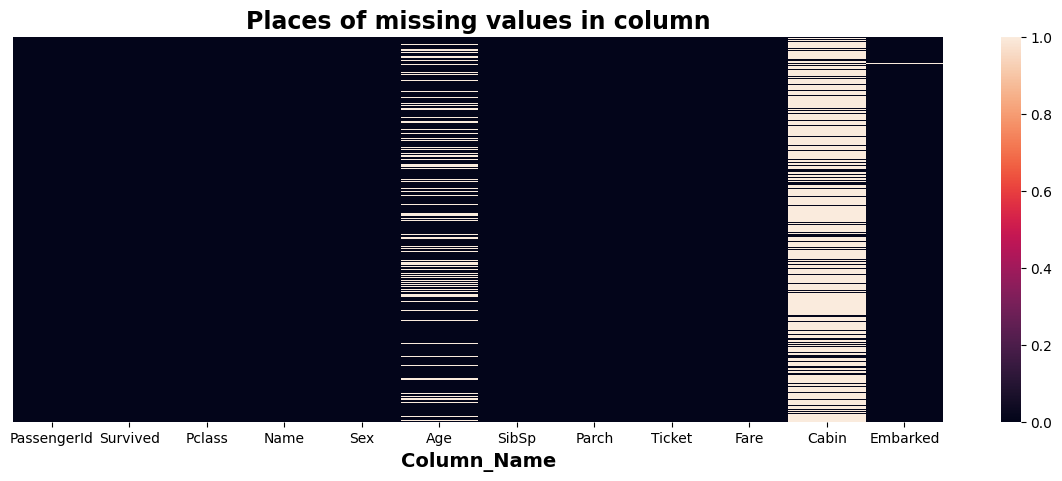

In [15]:
# No missing Values in our dataset
plt.figure(figsize=(15, 5))
sns.heatmap(train.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

- Train Dataset having 891 observations and 12 columns.

- Test Dataset having 418 observations and 11 columns

- In the dataset, there are object, float64, and int64 dtypes features present.

- Dataset is having numerical and categorical data.

- Mixed data(Numerical+Categorical)

- Dataset having 0 duplicate values

## **<u>Understanding Variables</u>**

In [16]:
# Bsic description of Dataset
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [17]:
# Finding categorical variables
categorical_variables = [var for var in train.columns if train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 5 categorical variables
------------------------------------------------------------------------------------------
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [18]:
for col in train.select_dtypes(include='object').columns:
  print(col)
  print (train[col].nunique())
  print('--'*45)

Name
891
------------------------------------------------------------------------------------------
Sex
2
------------------------------------------------------------------------------------------
Ticket
681
------------------------------------------------------------------------------------------
Cabin
147
------------------------------------------------------------------------------------------
Embarked
3
------------------------------------------------------------------------------------------


In [19]:
# Finding numerical variables
numerical_variables=[var for var in train.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [20]:
discrete_variable = [feature for feature in numerical_variables if len(train[feature].unique())<25]
print("Discrete variables count:{}".format(len(discrete_variable)))

Discrete variables count:4


* There is 4 discrete variable in given dataset.

In [21]:
continuous_variable = [feature for feature in numerical_variables if feature not in discrete_variable]
print("Continuous variables count:{}".format(len(continuous_variable)))
continuous_variable

Continuous variables count:3


['PassengerId', 'Age', 'Fare']

In [22]:
# Checking unique values from each variable
for i in train.columns.tolist():
  print("No. of unique values in", i ,"is", train[i].nunique())
  print('--'*50)

No. of unique values in PassengerId is 891
----------------------------------------------------------------------------------------------------
No. of unique values in Survived is 2
----------------------------------------------------------------------------------------------------
No. of unique values in Pclass is 3
----------------------------------------------------------------------------------------------------
No. of unique values in Name is 891
----------------------------------------------------------------------------------------------------
No. of unique values in Sex is 2
----------------------------------------------------------------------------------------------------
No. of unique values in Age is 88
----------------------------------------------------------------------------------------------------
No. of unique values in SibSp is 7
----------------------------------------------------------------------------------------------------
No. of unique values in Parch is 7
---

unique values in PassengerId is 891

 unique values in Survived is 2

 unique values in Pclass is 3

 unique values in Name is 891

unique values in Sex is 2

unique values in Age is 88

unique values in SibSp is 7

unique values in Parch is 7

unique values in Ticket is 681

unique values in Fare is 248

unique values in Embarked is 3

# **Data Cleaning**

#### **<u> Handling Duplicate Values</u>**

In [23]:
# Checking duplicated values in dataset
count_duplicated = train.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


#### **<u> Handling Null / Missing Values</u>**

In [24]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [25]:
train['Embarked'].fillna('S',inplace=True)

In [26]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [28]:
gen_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(), size=177)

In [29]:
train['Age'][np.isnan(train['Age'])]=gen_age

In [30]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
gen_age1=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(), size=86)


In [32]:
test['Age'][np.isnan(test['Age'])]=gen_age1

In [33]:
# Nullfree shape of dataset
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
# Nullfree shape of dataset
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### **<u>Handling Outliers</u>**

__________________________________________________________________________________________


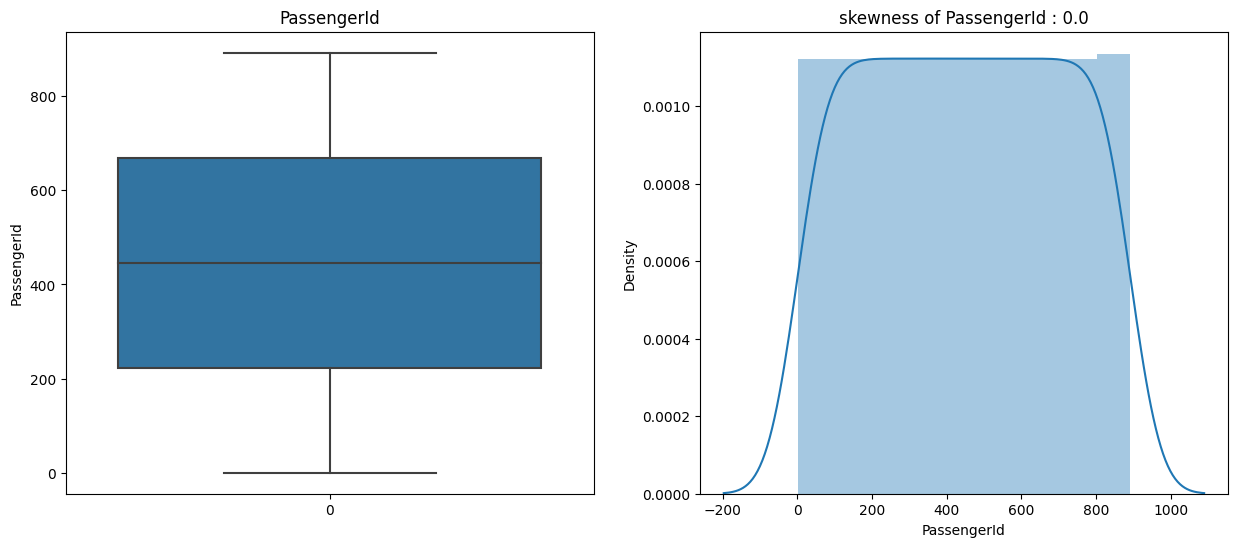

__________________________________________________________________________________________


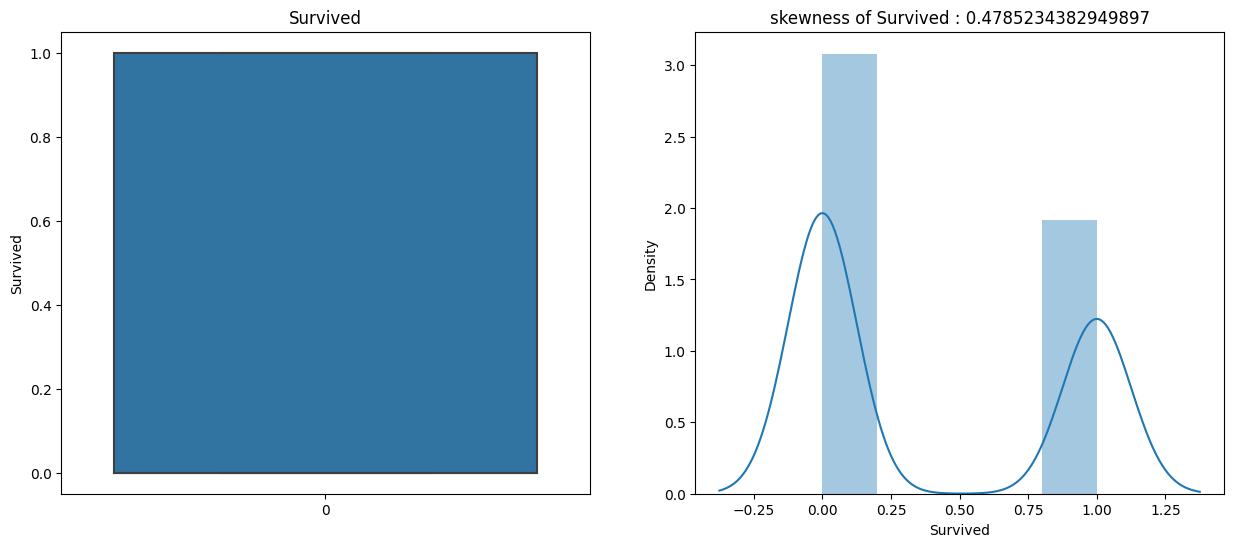

__________________________________________________________________________________________


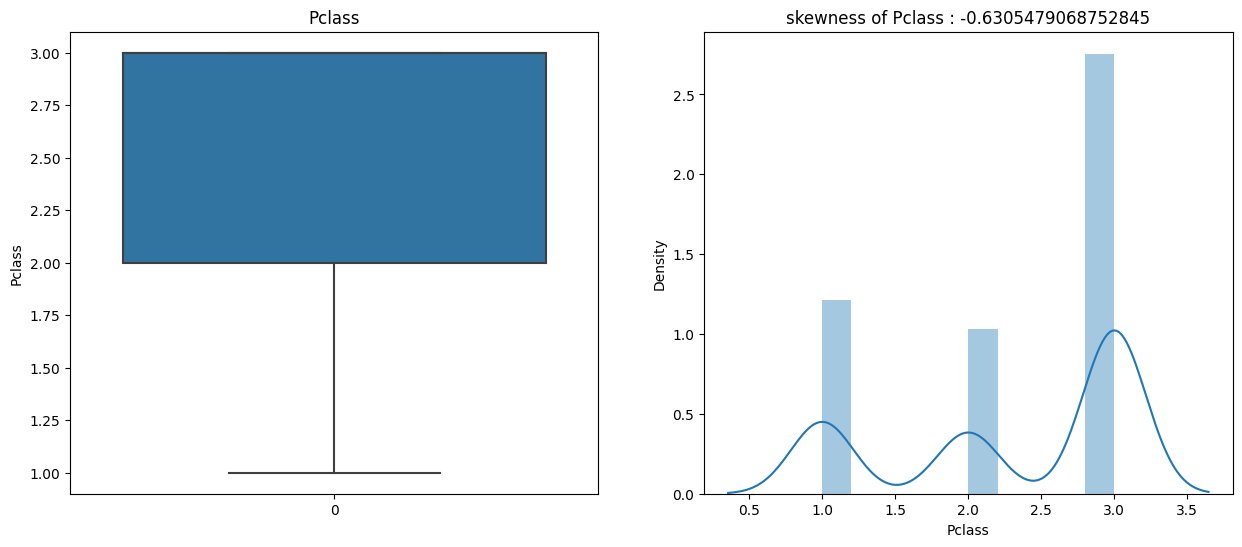

__________________________________________________________________________________________


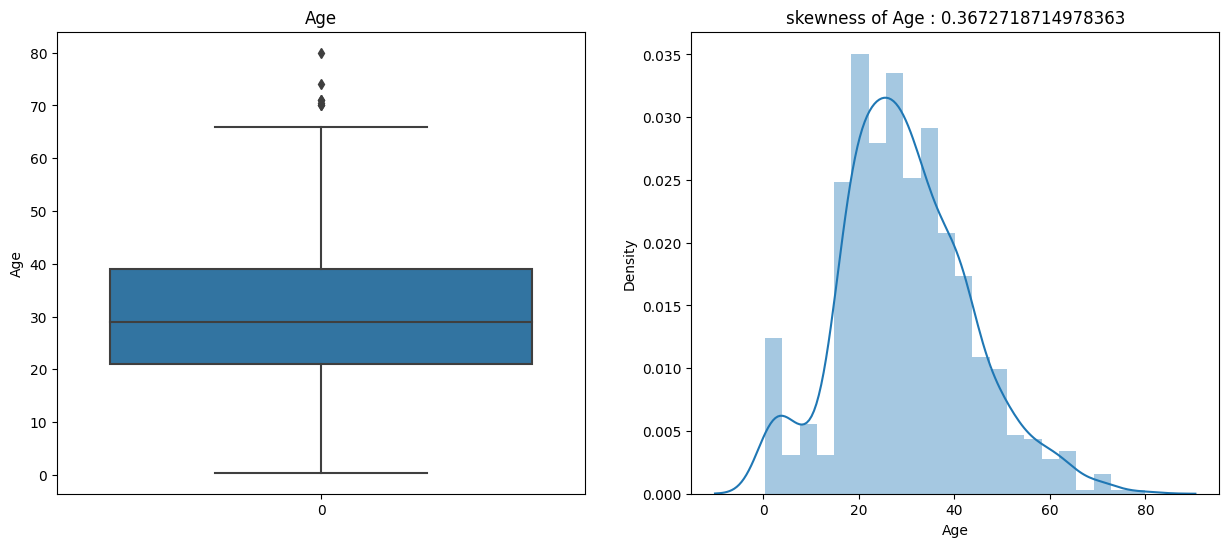

__________________________________________________________________________________________


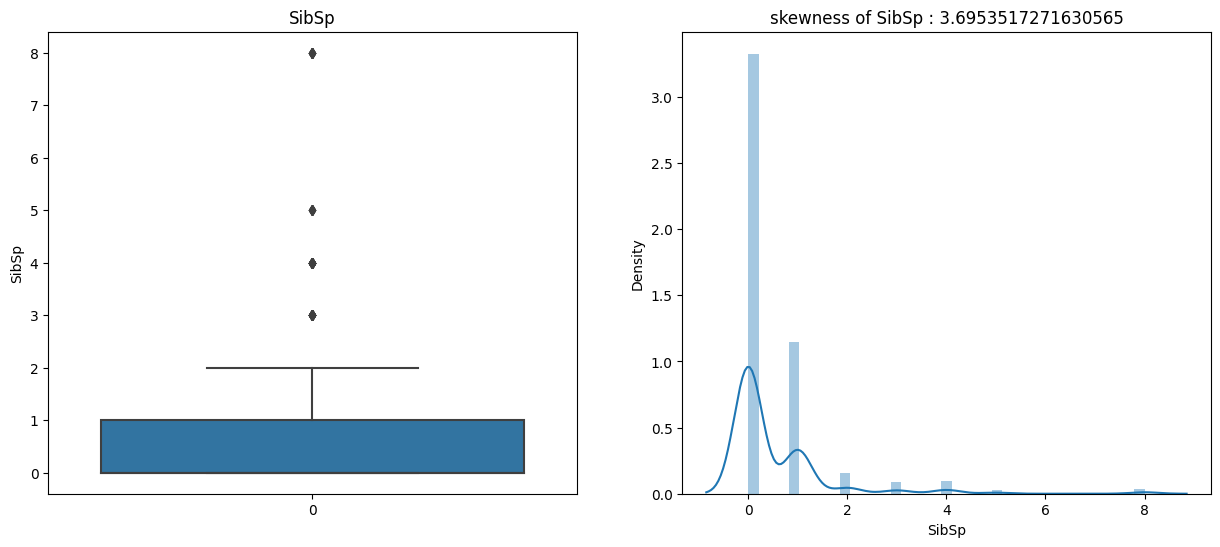

__________________________________________________________________________________________


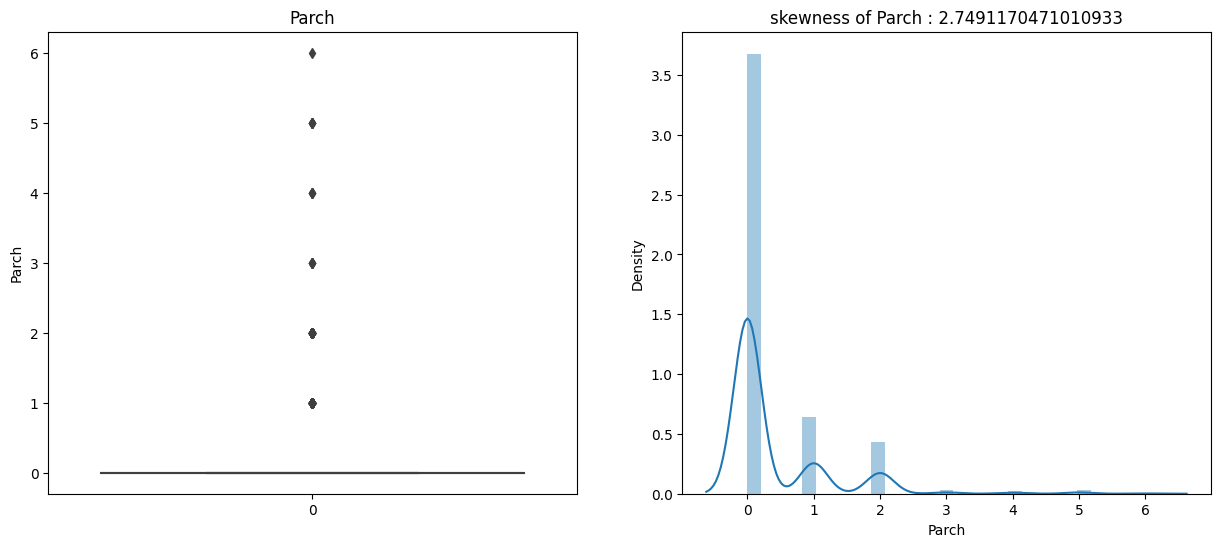

__________________________________________________________________________________________


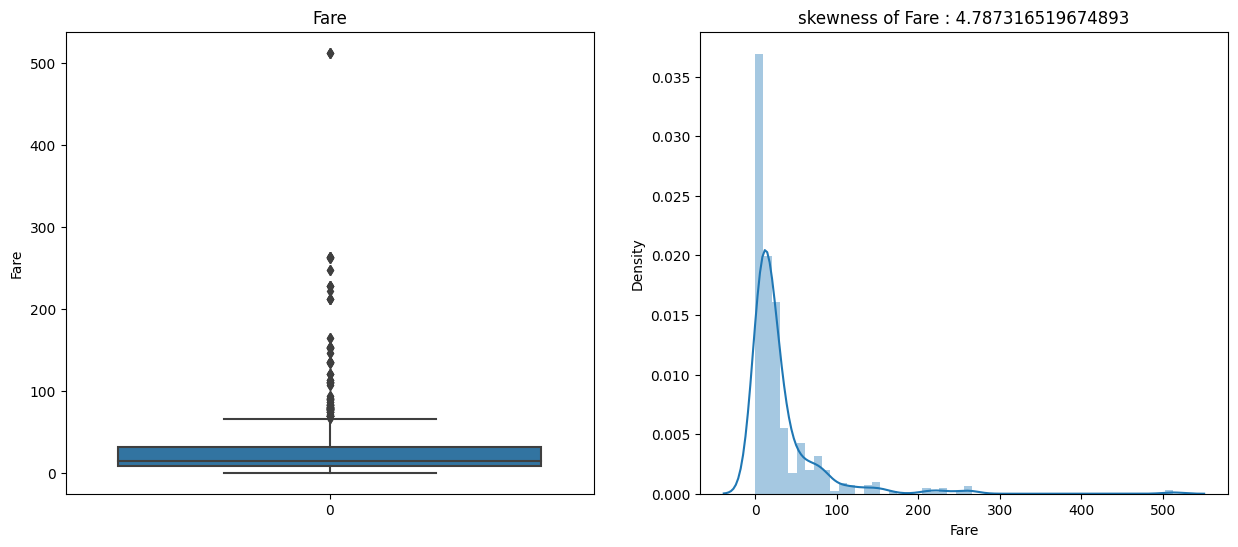

In [35]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

numerical_variables=['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Plotting Box and Distribution plot using for loop
for var in numerical_variables:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=train[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(train[var])
    ax.set_title(f'skewness of {var} : {train[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

In [36]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features but remove flat IQR feature pdays and previous
outlier_var=[ 'Age', 'SibSp', 'Parch', 'Fare']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=train[i].quantile(0.25)
    Q3=train[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit =train[i].quantile(0.25)-1.5*IQR
    upper_limit =train[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    train.loc[(train[i] > upper_limit),i] = upper_limit
    train.loc[(train[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


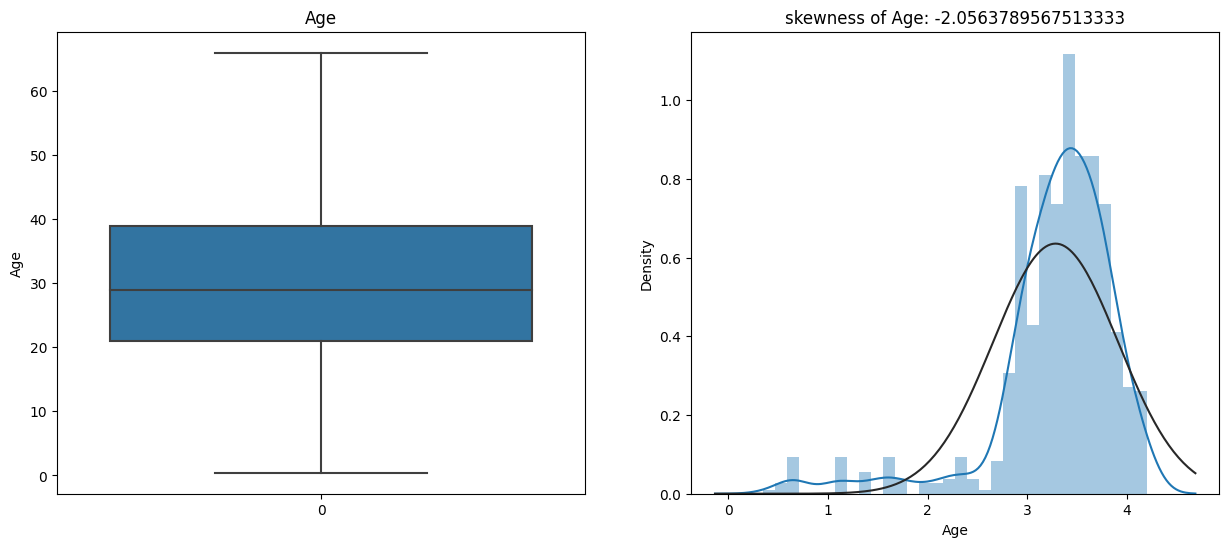

__________________________________________________________________________________________


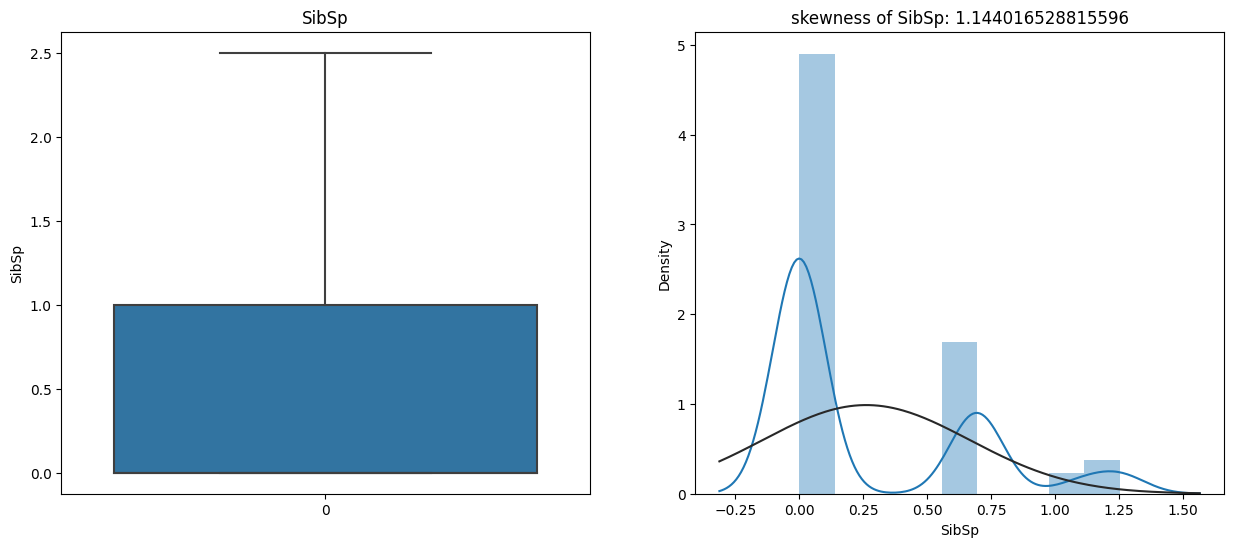

Variance of Parch is too low to fit a normal distribution.
__________________________________________________________________________________________


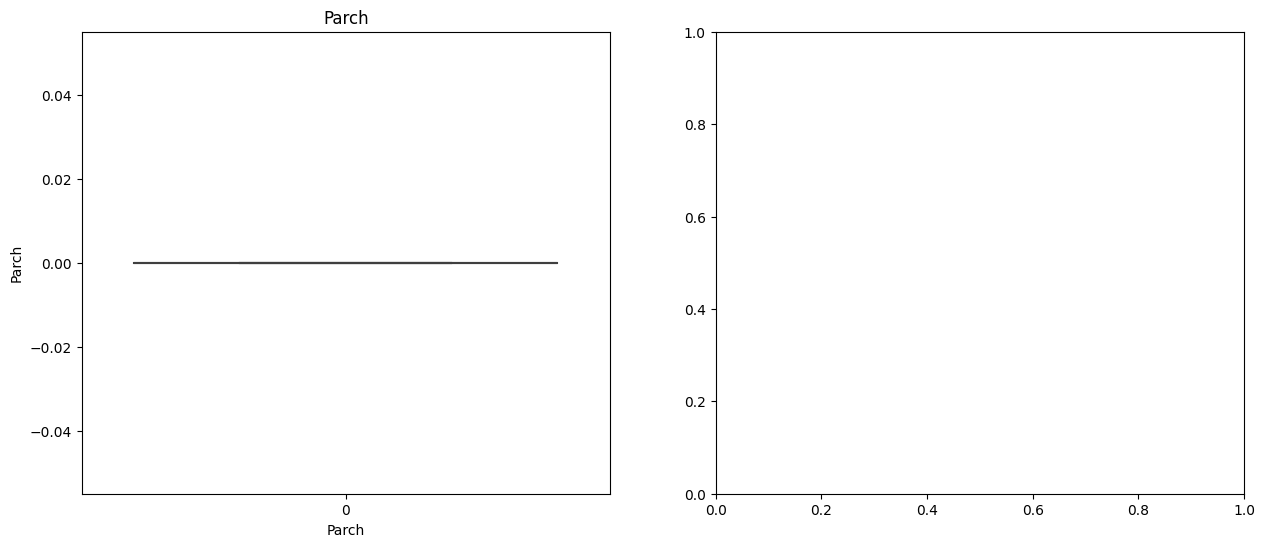

__________________________________________________________________________________________


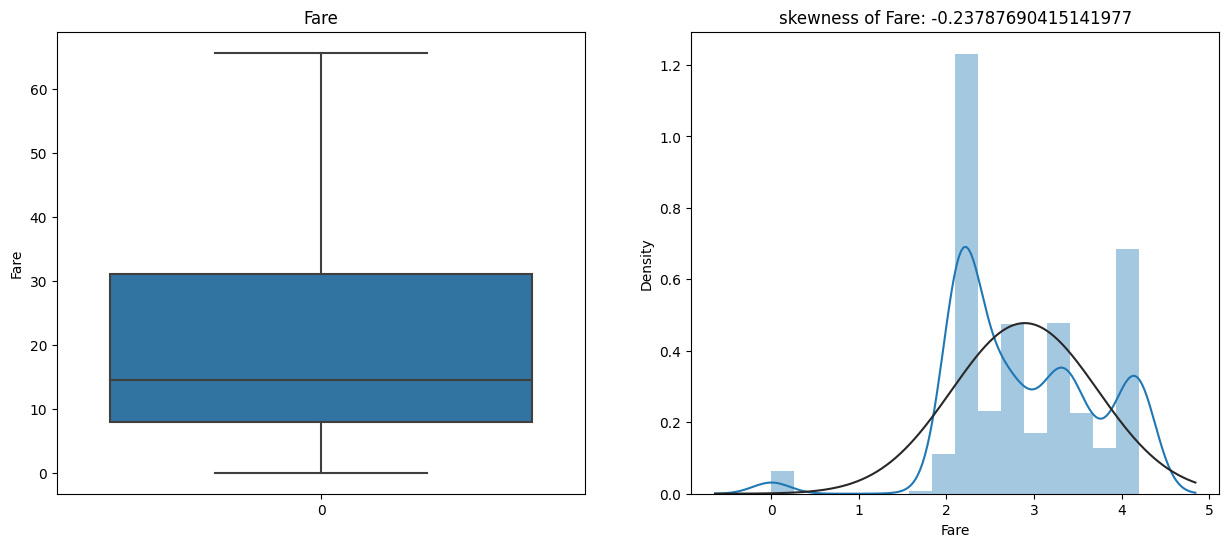

In [37]:
# Using boxplot checking outliers in features after removed using IQR
import numpy as np
from scipy import stats

for var in outlier_var:
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    ax = sns.boxplot(data=train[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1, 2, 2)
    if train[var].var() > 0.001:  # Check for non-zero variance
        transformed_var = np.log1p(train[var])  # Apply log transformation
        ax = sns.distplot(transformed_var, fit=stats.norm)
        ax.set_title(f'skewness of {var}: {transformed_var.skew()}')
    else:
        print(f"Variance of {var} is too low to fit a normal distribution.")

    ax.set_xlabel(var)
    print('__' * 45)
    plt.show()


In [38]:
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [39]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [40]:
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


# **::---------Exploratory Data Analysis -----------::**

In [41]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


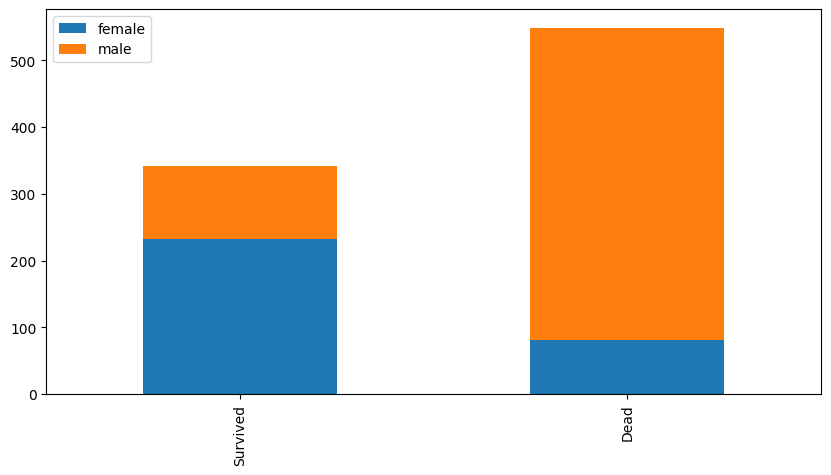

In [42]:
bar_chart('Sex')
print("Survived :\n",train[train['Survived']==1]['Sex'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Sex'].value_counts())

The Chart confirms Women more likely survivied than Men.

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


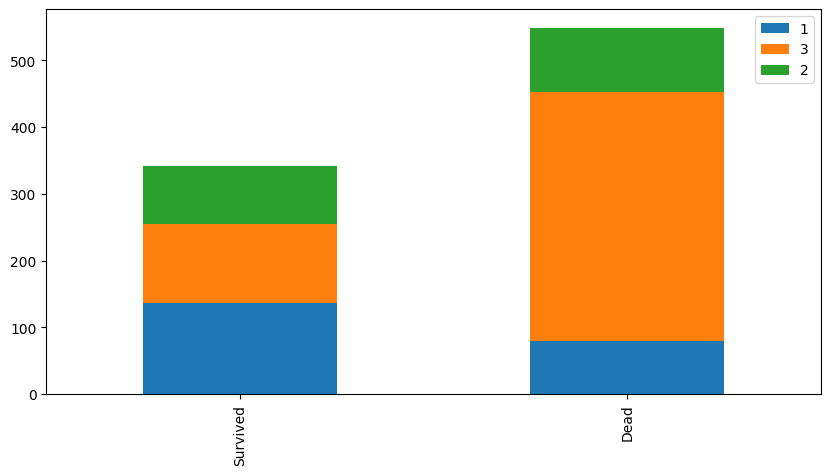

In [43]:
bar_chart('Pclass')
print("Survived :\n",train[train['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Pclass'].value_counts())

The Chart confirms 1st class more likely survivied than other classes.

The Chart confirms 3rd class more likely dead than other classes

Survived :
 0.0    210
1.0    112
2.0     13
2.5      7
Name: SibSp, dtype: int64
Dead:
 0.0    398
1.0     97
2.5     39
2.0     15
Name: SibSp, dtype: int64


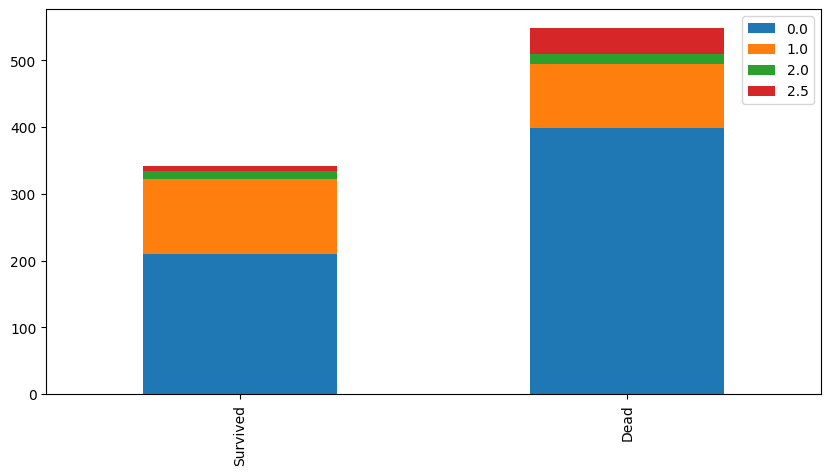

In [44]:
bar_chart('SibSp')
print("Survived :\n",train[train['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",train[train['Survived']==0]['SibSp'].value_counts())

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived.

The Chart confirms a person aboarded without siblings or spouse more likely dead

Survived :
 0    342
Name: Parch, dtype: int64
Dead:
 0    549
Name: Parch, dtype: int64


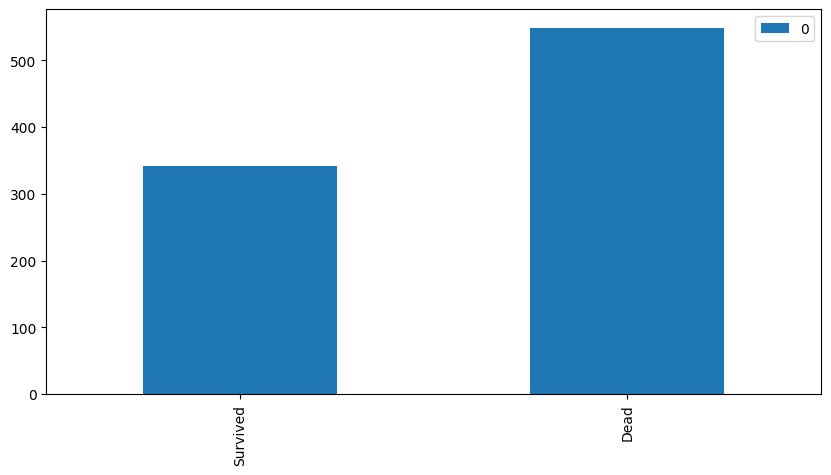

In [45]:
bar_chart('Parch')
print("Survived :\n",train[train['Survived']==1]['Parch'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Parch'].value_counts())

The Chart confirms a person aboarded with more than 2 parents or children more likely survived.

The Chart confirms a person aboarded alone more likely dead

Survived :
 S    219
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


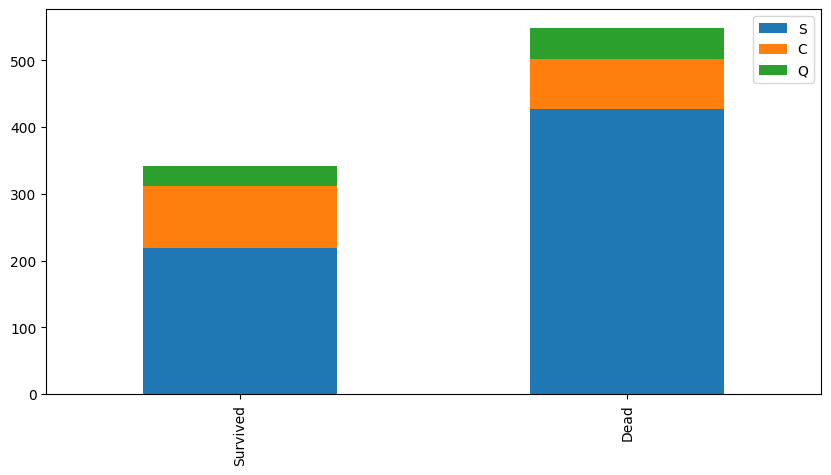

In [46]:
bar_chart('Embarked')
print("Survived :\n",train[train['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Embarked'].value_counts())

The Chart confirms a person aboarded from C slightly more likely survived.

The Chart confirms a person aboarded from Q more likely dead.

The Chart confirms a person aboarded from S more likely dead.

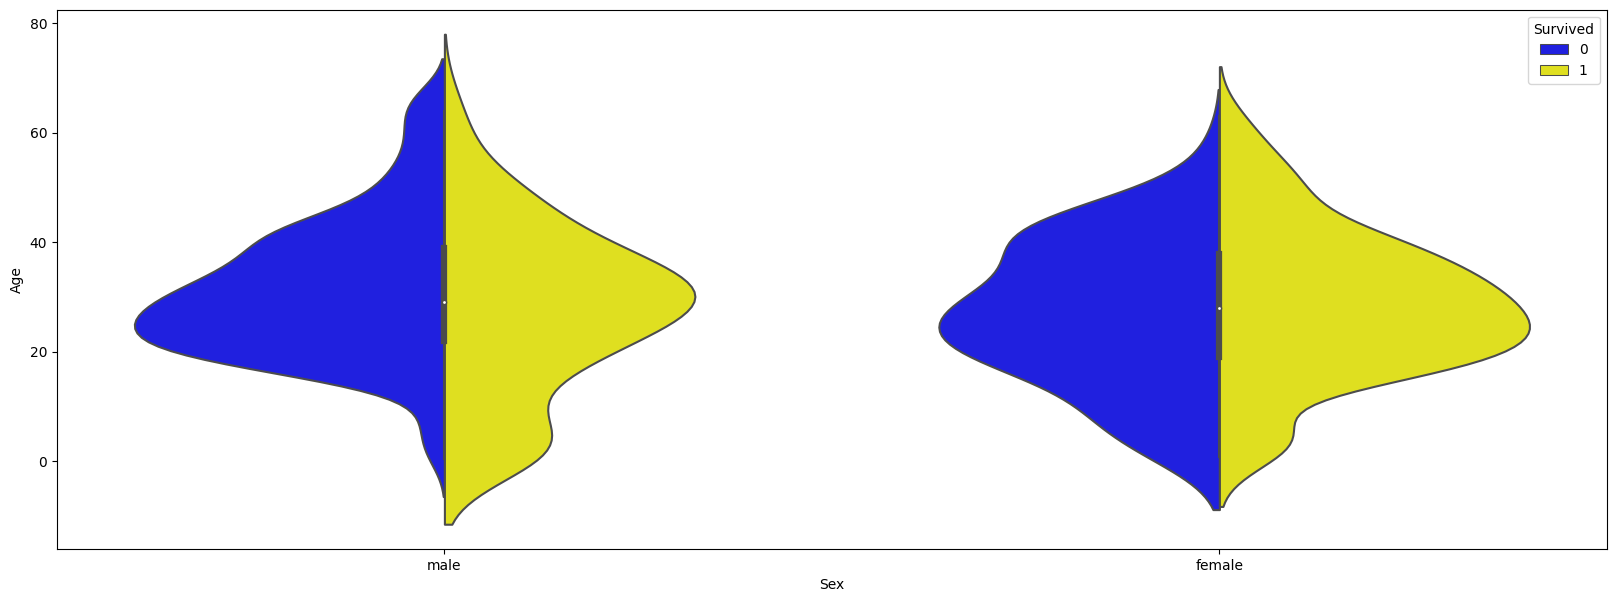

In [47]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 7))
sns.violinplot(x='Sex', y='Age',
               hue='Survived', data=train,
               split=True,
               palette={0: "blue", 1: "yellow"}
              );

Younger male tend to survive.

Infants (Age <=4) had high survival rate.

Oldest passengers (Age = 80) survived.

A large number of passengers between 20 and 40 die.

The age doesn't seem to have a direct impact on the female survival

<Axes: >

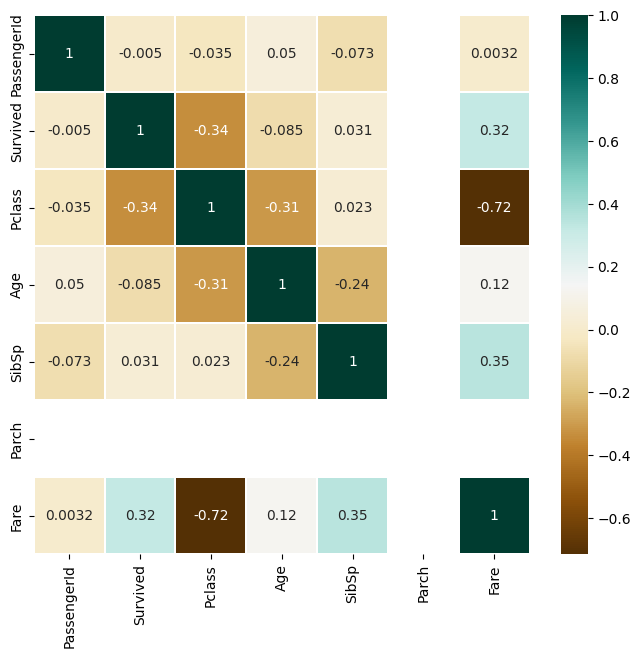

In [48]:
corr_matrix = train.corr()
plt.figure(figsize=(8, 7))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)


There are no very highly correlated columns.

# **Data Pre-processing**

## **Categorical Encoding**

In [49]:
# Checking basic info of dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 76.7+ KB


In [50]:
# Addressing categorical variables from the dataset
categorical_variables=train.describe(include=['object']).columns
print(f'Categorical variables are : {list(categorical_variables)}')

Categorical variables are : ['Name', 'Sex', 'Ticket', 'Embarked']


In [51]:
# Checking categories in each categorical features
for var in categorical_variables:
    print(train[var].value_counts())
    print('__'*45)

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
__________________________________________________________________________________________
male      577
female    314
Name: Sex, dtype: int64
__________________________________________________________________________________________
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
____________________________

In [52]:
df = pd.concat([train, test]).reset_index(drop=True)
print(df.shape)

(1309, 11)


In [53]:
df['Name_length'] = df['Name'].str.len()

In [54]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [55]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

In [56]:
df['Fare'] = df['Fare'].fillna(train['Fare'].median())
# Mapping Fare
df.loc[ df['Fare'] <= 7.91, 'Fare'] 						        = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[ df['Fare'] > 31, 'Fare'] 							        = 3
df['Fare'] = df['Fare'].astype(int)

In [57]:
df['Age'] = df['Age'].apply(lambda x: np.random.choice(df['Age'].dropna().values) if np.isnan(x) else x)
print(df['Age'].head(20))

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     16.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    20.0
18    31.0
19    19.0
Name: Age, dtype: float64


In [58]:
df['Age'] = df['Age'].astype(int)
# Mapping Age
df.loc[ df['Age'] <= 16, 'Age'] 					= 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[ df['Age'] > 64, 'Age'] = 4 ;

In [59]:
df['Title'] = df['Name'].str.extract(pat = ' ([A-Za-z]+)\.' )
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')


In [60]:
# Mapping titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] =df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)

In [61]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Name_length']
df = df.drop(drop_elements, axis = 1)

In [62]:
# converting categorical Columns
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

#df = pd.get_dummies(df, prefix=['Embarked', 'Sex'], columns=['Embarked', 'Sex'])
# One hot encoding is not helping in this case


In [63]:
df.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0.0,3,0,1,0,0,0,2.0,0,1
1,1.0,1,1,2,0,3,1,2.0,0,3
2,1.0,3,1,1,0,1,0,1.0,1,2
3,1.0,1,1,2,0,3,0,2.0,0,3
4,0.0,3,0,2,0,1,0,1.0,1,1


In [64]:
# Replacing the unknown values with null across all the dataset
df = df.replace('unknown', np.nan)

In [65]:
# Checking for number of null values
count_null_df=pd.DataFrame({'columns':df.columns,'number_of_nulls_values':df.isna().sum(),'percentage_null_values':round(df.isna().sum()*100/len(df),2)})
count_null_df.set_index('columns').sort_values(by='percentage_null_values', ascending = False)

,number_of_nulls_values,percentage_null_values
columns,,
Survived,418,31.93
Pclass,0,0.00
Sex,0,0.00
Age,0,0.00
Parch,0,0.00
Fare,0,0.00
Embarked,0,0.00
FamilySize,0,0.00
IsAlone,0,0.00


In [66]:
# Replacing null values with the most frequent value in a variable
df['Survived']=df['Survived'].fillna(df['Survived'].mode()[0])

In [67]:
df.tail()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone,Title
1304,0.0,3,0,1,0,1,0,1.0,1,1
1305,0.0,1,1,2,0,3,1,1.0,1,5
1306,0.0,3,0,2,0,0,0,1.0,1,1
1307,0.0,3,0,1,0,1,0,1.0,1,1
1308,0.0,3,0,2,1,2,1,3.0,0,4


## **Separating Dependant and Independant variables**

In [68]:
## Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'Survived'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].copy()
# Create the data of dependent variable
y = df[dependent_variable].copy()

In [69]:
df.shape

(1309, 10)

## **Feature Manipulation & Selection**

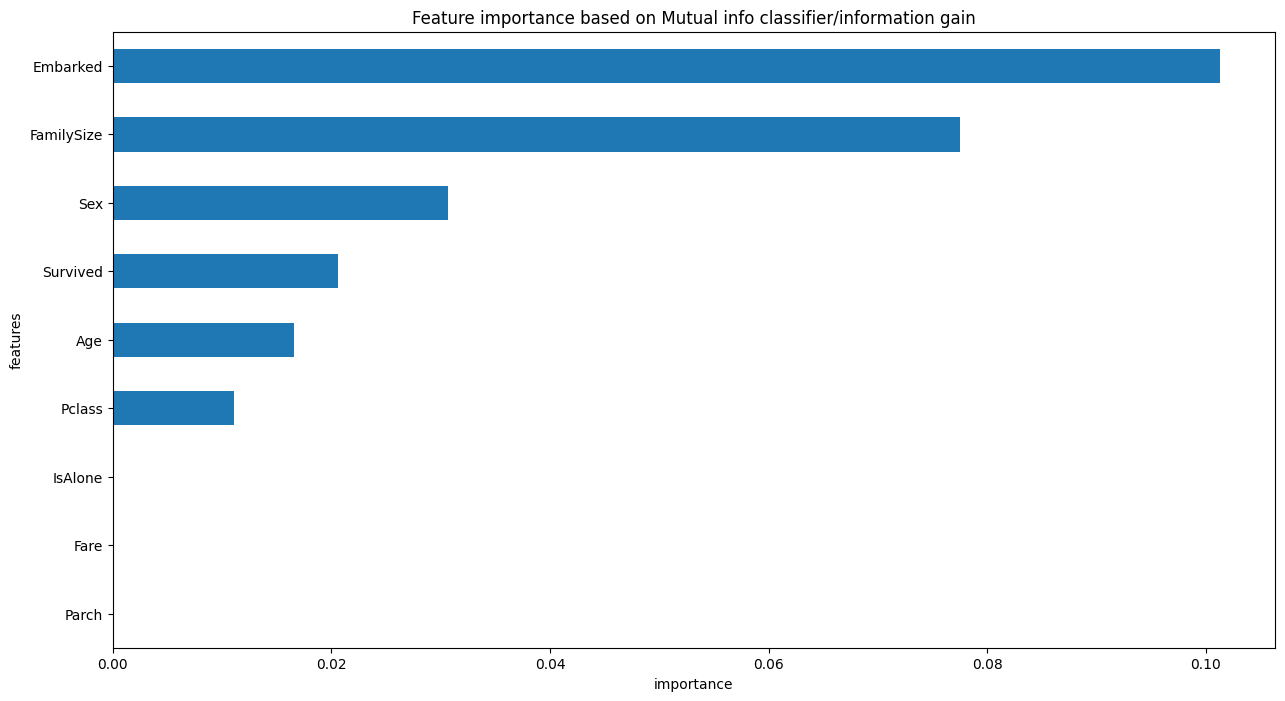

In [70]:
# Plotting feature importance for better selection to avoid overfitting

from sklearn.feature_selection import mutual_info_classif
importance = mutual_info_classif(X,y)
feature_importances = pd.Series(importance,df.columns[0:len(df.columns[0:9])]).sort_values(ascending=True)
plt.figure(figsize=(15,8))
feature_importances.plot(kind='barh')
plt.title("Feature importance based on Mutual info classifier/information gain")
plt.xlabel('importance')
plt.ylabel('features')
plt.show()

## **Handling Imbalanced Dataset**

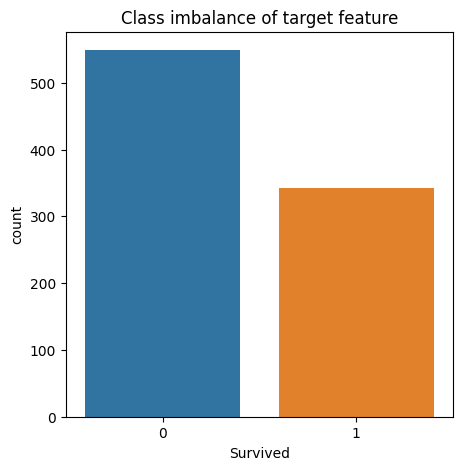

In [71]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=train['Survived'])
plt.title('Class imbalance of target feature')
plt.show()

In [72]:
# Import model imblearn in envirnoment
!pip install imblearn

In [73]:
# Using Synthetic Minority Oversampling Technique (SMOTE) for handling class imbalance

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X,y)

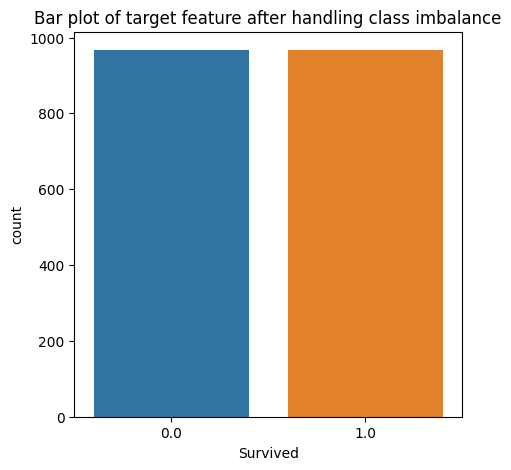

In [74]:
# Plotting bar graph to vizualize the class imbalance of target feature
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
sns.countplot(x=y_smote)
plt.title('Bar plot of target feature after handling class imbalance')
plt.show()

Class imbalance handled successfully using the Synthetic Minority Oversampling Technique (SMOTE).

## **Data Splitting**

In [101]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [102]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (1547, 9)
Shape of X_test : (387, 9)
Shape of y_train : (1547,)
Shape of y_test : (387,)


In [103]:
# Checking values of splitted dataset
X_train[0:3]

,Pclass,Parch,Fare,FamilySize,IsAlone,Embarked,Title,Sex,Age
192,3,0,0,2.0,0,0,2,1,1
1632,1,0,3,2.0,0,0,3,1,1
1708,3,0,2,2.0,0,0,3,1,1


In [104]:
# Checking values of splitted dataset
X_test[0:3]

,Pclass,Parch,Fare,FamilySize,IsAlone,Embarked,Title,Sex,Age
582,2,0,2,1.0,1,0,1,0,3
900,3,0,2,3.0,0,0,1,0,1
906,2,0,2,2.0,0,1,3,1,1


## **Data Scaling**

In [105]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. So we used MinMaxScaler for scaling the dataset.

In [106]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[1.        , 0.        , 0.        , 0.1       , 0.        ,
        0.        , 0.25      , 1.        , 0.25      ],
       [0.        , 0.        , 1.        , 0.1       , 0.        ,
        0.        , 0.5       , 1.        , 0.25      ],
       [1.        , 0.        , 0.66666667, 0.1       , 0.        ,
        0.        , 0.5       , 1.        , 0.25      ],
       [0.5       , 0.        , 0.33333333, 0.        , 1.        ,
        0.        , 0.25      , 1.        , 0.25      ],
       [1.        , 0.        , 0.33333333, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.5       ]])

In [107]:
# Checking values of splitted dataset after normalisation
X_test[0:5]

array([[0.5       , 0.        , 0.66666667, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.75      ],
       [1.        , 0.        , 0.66666667, 0.2       , 0.        ,
        0.        , 0.        , 0.        , 0.25      ],
       [0.5       , 0.        , 0.66666667, 0.1       , 0.        ,
        0.5       , 0.5       , 1.        , 0.25      ],
       [1.        , 0.        , 0.33333333, 0.18169667, 0.        ,
        0.5       , 0.25      , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 1.        ,
        0.5       , 0.25      , 1.        , 0.5       ]])

# **ML Model Implementation**

In [108]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [109]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def model(y_train, y_pred, model_name):

    # Define a function for evaluating metrics
    cm = confusion_matrix(y_train, y_pred)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    roc_auc = roc_auc_score(y_train, y_pred)

    print(f"{model_name} Evaluation Metrics:")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"ROC AUC Score: {roc_auc}")
    print('____________________________________')

    # Visualizes evaluation metrics
    fig, axes = plt.subplots(1, 2)
    ax1 = sns.heatmap(cm, annot=True, ax=axes[0], fmt='d')
    ax1.set_title('Confusion Matrix for training set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')
    ax2 = sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC Score'], y=[accuracy, precision, recall, f1, roc_auc], ax=axes[1])
    ax2.set_title('Evaluation Metrics for training set')
    ax2.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

    return


In [110]:
# Defining function to plot ROC curve
def plot_roc_curve(y_test, y_pred):
    """
    plots the roc curve
    """
    # Generate a list of false and true positive rates
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    # Calculate the area under the curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    # Labeling the graph
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    # Show the plot
    plt.show()

## **Logistic Regression Model**

In [111]:
# Fitting  LogisticRegression model to training set
lr = LogisticRegression().fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [112]:
# Predicting results for train and test set
y_tr_pred = lr.predict(X_train)
y_ts_pred = lr.predict(X_test)

In [113]:
y_ts_pred,y_tr_pred

(array([0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
        0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
        0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
        1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
        1., 

Test set evaluation result
____________________________________
LogisticRegression Evaluation Metrics:
Confusion Matrix:
[[136  47]
 [ 40 164]]
Accuracy: 0.7751937984496124
Precision: 0.7772511848341233
Recall: 0.803921568627451
F1 Score: 0.7903614457831326
ROC AUC Score: 0.7735454837672774
____________________________________


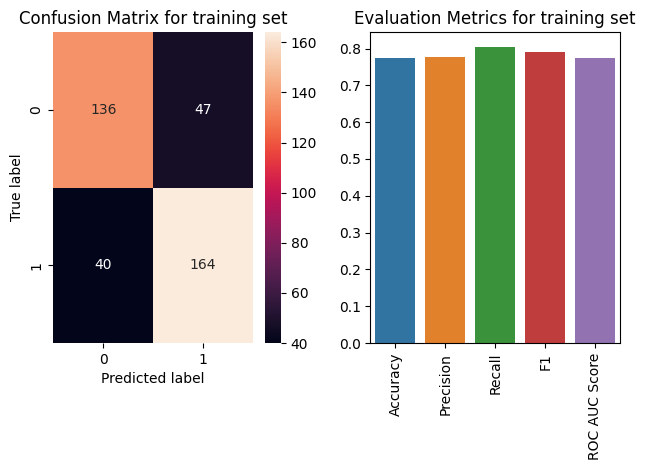

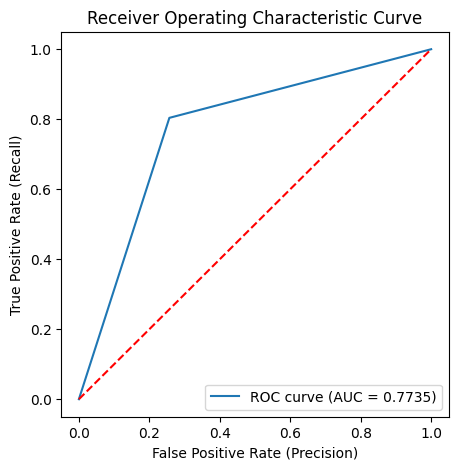

In [114]:
# Score of the model
print(f'Test set evaluation result\n____________________________________')
model(y_test, y_ts_pred, "LogisticRegression")

# Plot roc curve for Logistic Regression classifier
y_ts_pred = lr.predict(X_test)
plot_roc_curve(y_test, y_ts_pred)

In [115]:
# Intercept
lr.intercept_

array([0.67997981])

In [116]:
# Coefficients
lr.coef_

array([[-1.45915311, -3.85320775,  0.07629574, -3.3997333 , -0.0460629 ,
        -0.16548341,  1.44601731,  1.6477078 , -2.20683826]])

# **Train Multiple Models**

In [117]:
# Fitting Support Vector Classifier model to training set
svc = SVC().fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Fitting Naive Bayse model to training set
nb = GaussianNB().fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Fitting Neural Network model to training set
nn = MLPClassifier().fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

# Fitting Gradient Boosting (GBM) to training set
gbm = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

# Fitting KNN Classifier model to training set
knn = KNeighborsClassifier().fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


# Fitting Decision Tree  model to training set
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Fitting Random Forest  model to training set
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Fitting XGBoost model to training set
xgb = XGBClassifier().fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

## **Score of the models:-**

Test set evaluation result
____________________________________
LogisticRegression Evaluation Metrics:
Confusion Matrix:
[[136  47]
 [ 40 164]]
Accuracy: 0.7751937984496124
Precision: 0.7772511848341233
Recall: 0.803921568627451
F1 Score: 0.7903614457831326
ROC AUC Score: 0.7735454837672774
____________________________________


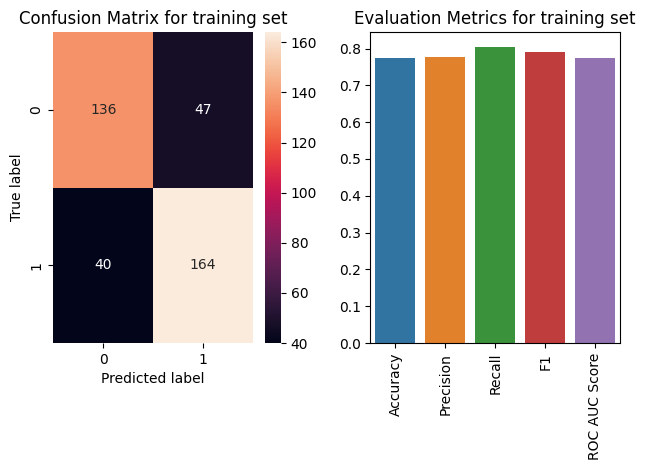

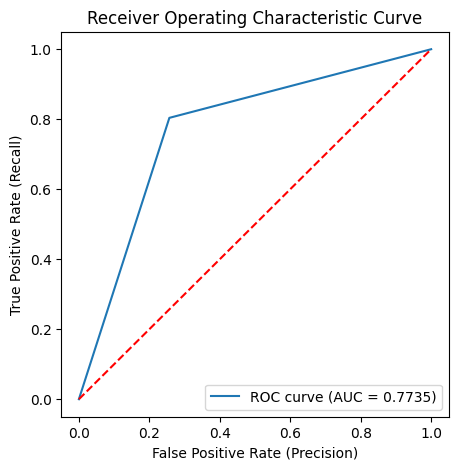

 SVC Evaluation Metrics:
Confusion Matrix:
[[147  36]
 [ 46 158]]
Accuracy: 0.7881136950904393
Precision: 0.8144329896907216
Recall: 0.7745098039215687
F1 Score: 0.793969849246231
ROC AUC Score: 0.7888942462230794
____________________________________


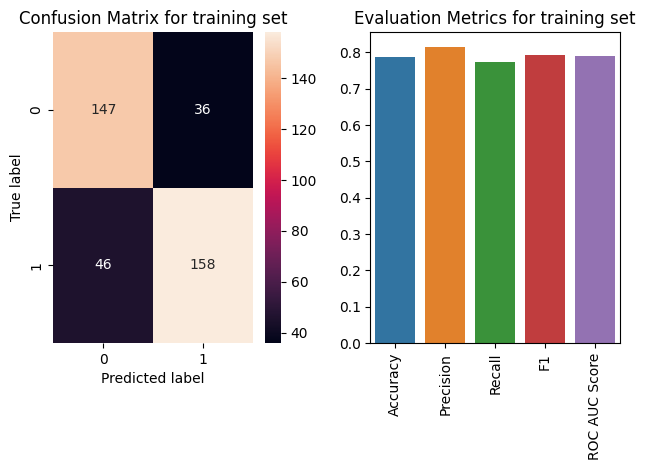

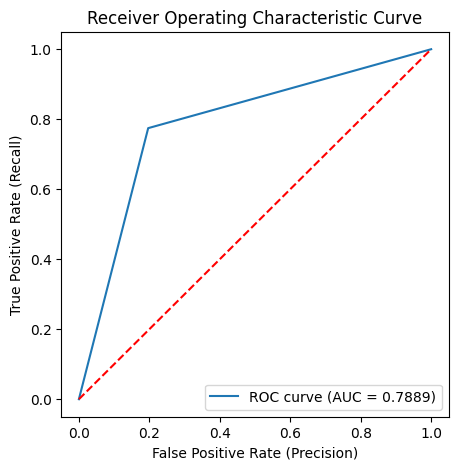

Naive Bayse Evaluation Metrics:
Confusion Matrix:
[[ 22 161]
 [  0 204]]
Accuracy: 0.5839793281653747
Precision: 0.5589041095890411
Recall: 1.0
F1 Score: 0.7170474516695958
ROC AUC Score: 0.5601092896174864
____________________________________


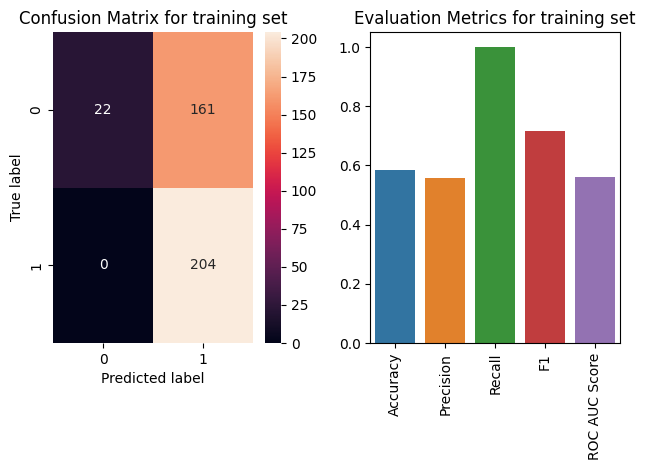

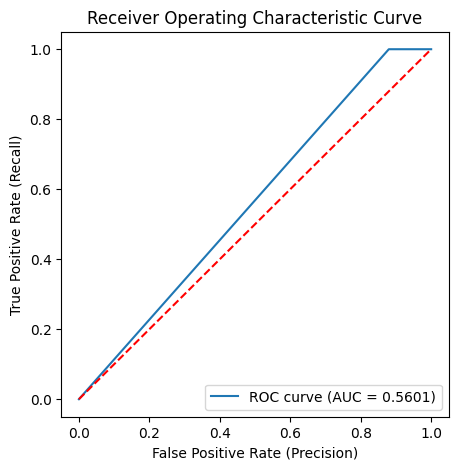

Neural Network Evaluation Metrics:
Confusion Matrix:
[[143  40]
 [ 40 164]]
Accuracy: 0.7932816537467701
Precision: 0.803921568627451
Recall: 0.803921568627451
F1 Score: 0.8039215686274509
ROC AUC Score: 0.7926711668273867
____________________________________


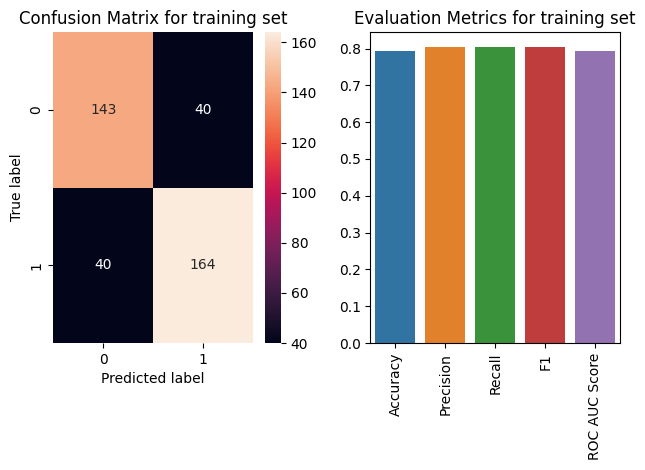

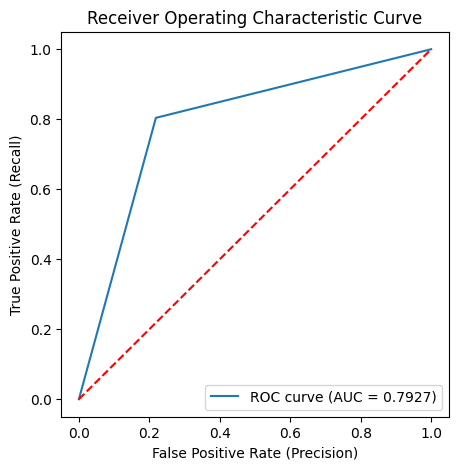

GradientBoostingClassifier Evaluation Metrics:
Confusion Matrix:
[[140  43]
 [ 29 175]]
Accuracy: 0.813953488372093
Precision: 0.8027522935779816
Recall: 0.8578431372549019
F1 Score: 0.8293838862559242
ROC AUC Score: 0.8114352298296367
____________________________________


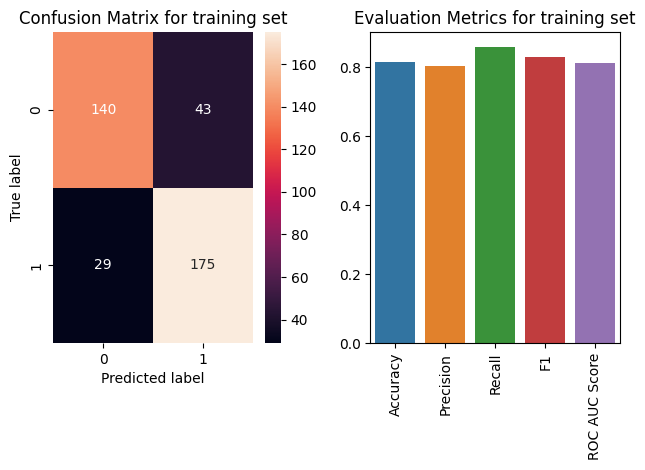

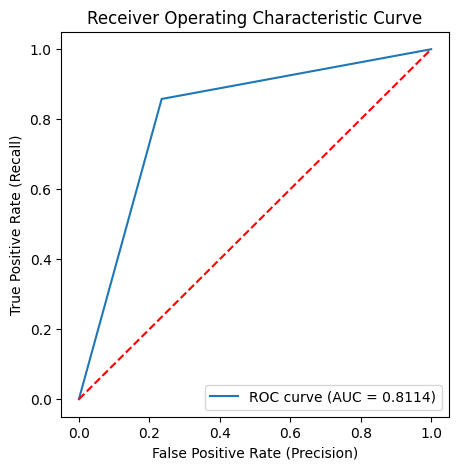

KNN Evaluation Metrics:
Confusion Matrix:
[[133  50]
 [ 26 178]]
Accuracy: 0.8036175710594315
Precision: 0.7807017543859649
Recall: 0.8725490196078431
F1 Score: 0.8240740740740741
ROC AUC Score: 0.799662487945998
____________________________________


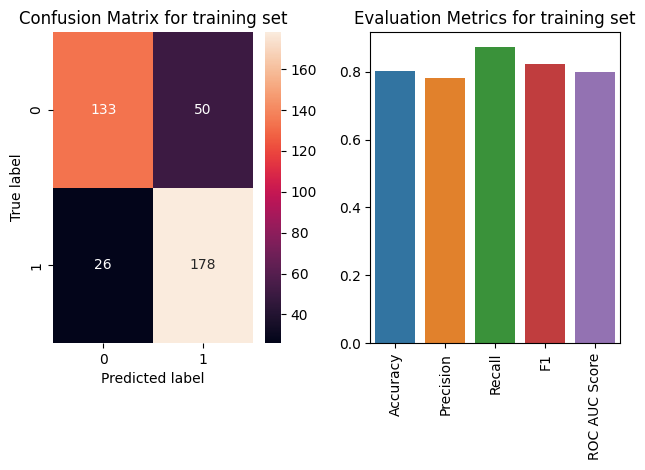

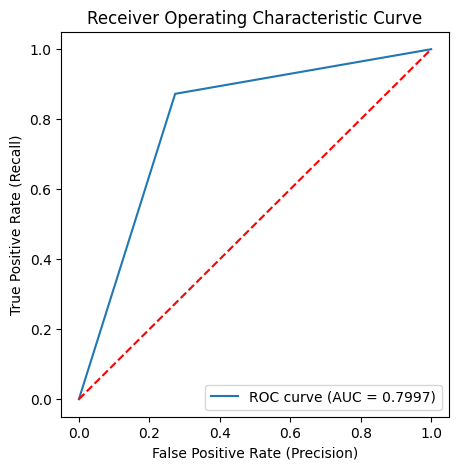

DecisionTreeClassifier Evaluation Metrics:
Confusion Matrix:
[[150  33]
 [ 38 166]]
Accuracy: 0.8165374677002584
Precision: 0.8341708542713567
Recall: 0.8137254901960784
F1 Score: 0.8238213399503721
ROC AUC Score: 0.8166988106718097
____________________________________


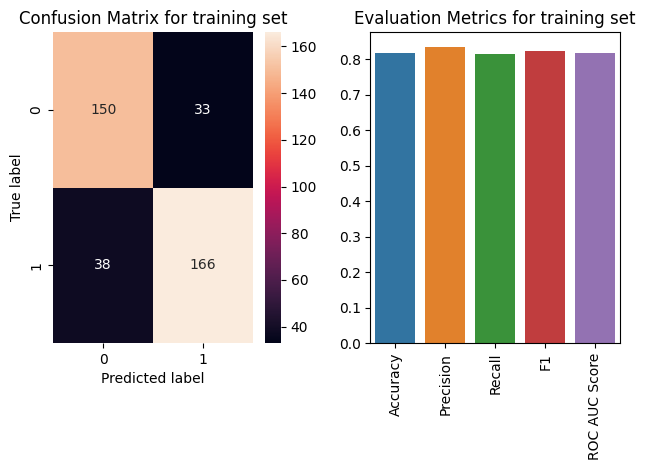

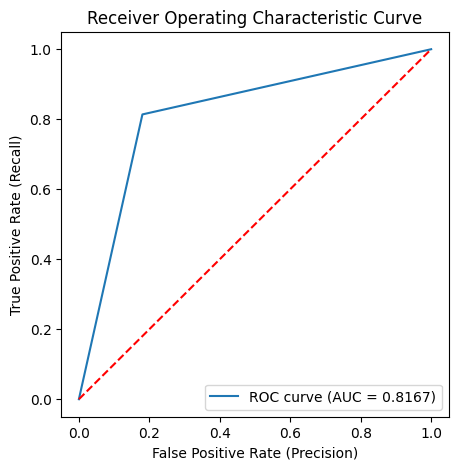

RandomForestClassifier Evaluation Metrics:
Confusion Matrix:
[[145  38]
 [ 32 172]]
Accuracy: 0.8191214470284238
Precision: 0.819047619047619
Recall: 0.8431372549019608
F1 Score: 0.8309178743961353
ROC AUC Score: 0.8177434908389586
____________________________________


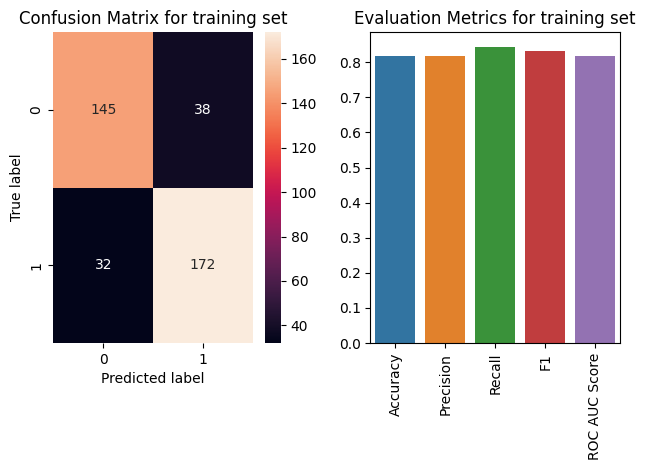

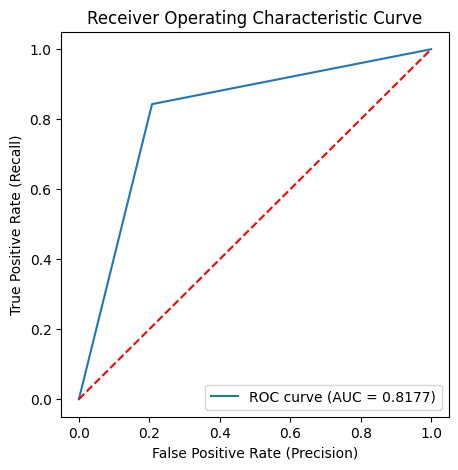

XGBClassifier Evaluation Metrics:
Confusion Matrix:
[[146  37]
 [ 29 175]]
Accuracy: 0.8294573643410853
Precision: 0.8254716981132075
Recall: 0.8578431372549019
F1 Score: 0.8413461538461539
ROC AUC Score: 0.8278286724525876
____________________________________


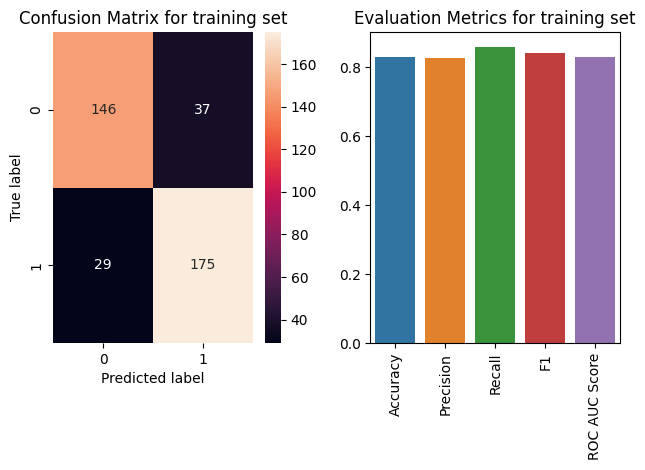

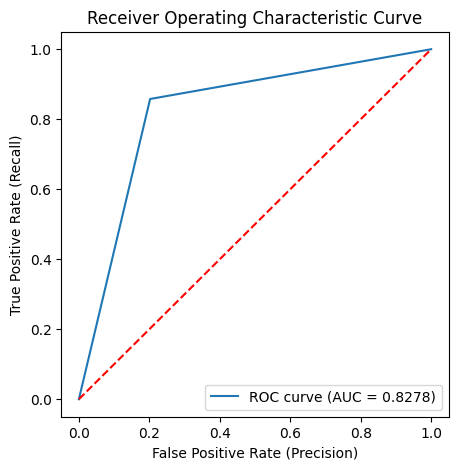

In [118]:
# Evaluating model
print(f'Test set evaluation result\n____________________________________')
model(y_test, y_pred_lr, "LogisticRegression")
# Plot roc curve for Logistic Regression classifier
y_ts_pred = lr.predict(X_test)
plot_roc_curve(y_test, y_ts_pred)

model(y_test, y_pred_svc, " SVC")
# Plot roc curve for Support Vector Classifier
y_ts_pred = svc.predict(X_test)
plot_roc_curve(y_test, y_ts_pred)

model(y_test, y_pred_nb, "Naive Bayse")
# Plot roc curve for Naive Bayse
y_ts_pred = nb.predict(X_test)
plot_roc_curve(y_test, y_ts_pred)

model(y_test, y_pred_nn, "Neural Network")

# Plot roc curve for Neural Network
y_ts_pred = nn.predict(X_test)
plot_roc_curve(y_test, y_ts_pred)

model(y_test, y_pred_gbm, "GradientBoostingClassifier")
# Plot roc curve for Gradient Boosting (GBM)
y_ts_pred = gbm.predict(X_test)
plot_roc_curve(y_test, y_ts_pred)

model(y_test, y_pred_knn, "KNN")
# Plot roc curve for  KNN Classifier
y_ts_pred = knn.predict(X_test)
plot_roc_curve(y_test, y_ts_pred)

model(y_test, y_pred_dt, "DecisionTreeClassifier")
# Plot roc curve for DecisionTreeClassifier
y_ts_pred = dt.predict(X_test)
plot_roc_curve(y_test, y_ts_pred)

model(y_test, y_pred_rf, "RandomForestClassifier")
# Plot roc curve for RandomForestClassifier
y_ts_pred = rf.predict(X_test)
plot_roc_curve(y_test, y_ts_pred)

model(y_test, y_pred_xgb, "XGBClassifier")
# Plot roc curve for XtremeBoost Classifier
y_ts_pred = xgb.predict(X_test)
plot_roc_curve(y_test, y_ts_pred)

## **Best model appears to be XGBoostClassifier**

# **Hyperparameter Tuning for XGBoost Classifier**

Fitting 5 folds for each of 48 candidates, totalling 240 fits
XGBoostClassifier With Best Parameters Evaluation Metrics:
Confusion Matrix:
[[147  36]
 [ 29 175]]
Accuracy: 0.8320413436692506
Precision: 0.8293838862559242
Recall: 0.8578431372549019
F1 Score: 0.8433734939759034
ROC AUC Score: 0.8305609128897461
____________________________________


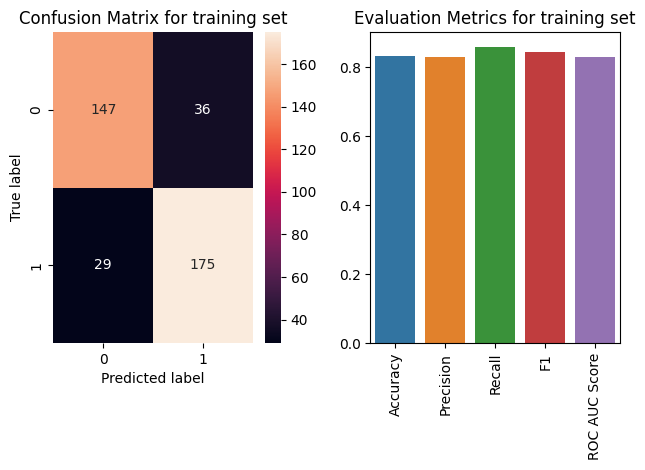

Time taken to train using GridSearchCV: 8.842417001724243
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}


In [123]:
from sklearn.model_selection import GridSearchCV
import time
from xgboost import XGBClassifier

start_time = time.time()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(50, 150, 50),
    'learning_rate': [0.1, 0.01, 0.05]
}

# Create an XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', seed=20)

# Create GridSearchCV
gscv = GridSearchCV(estimator=xgb,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=5,
                    verbose=1)

# Fit GridSearchCV to find the best hyperparameters
gscv.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_xgb = gscv.best_estimator_

# Make predictions on the test data using the best model
y_pred_xgb_random = best_xgb.predict(X_test)

# Evaluate the model using your get_metrics function
model(y_test, y_pred_xgb_random, "XGBoostClassifier With Best Parameters")

print("Time taken to train using GridSearchCV:", time.time() - start_time)

print("Best parameters:", gscv.best_params_)

XGBClassifier With Best Parameters Evaluation Metrics:
Confusion Matrix:
[[147  36]
 [ 29 175]]
Accuracy: 0.8320413436692506
Precision: 0.8293838862559242
Recall: 0.8578431372549019
F1 Score: 0.8433734939759034
ROC AUC Score: 0.8305609128897461
____________________________________


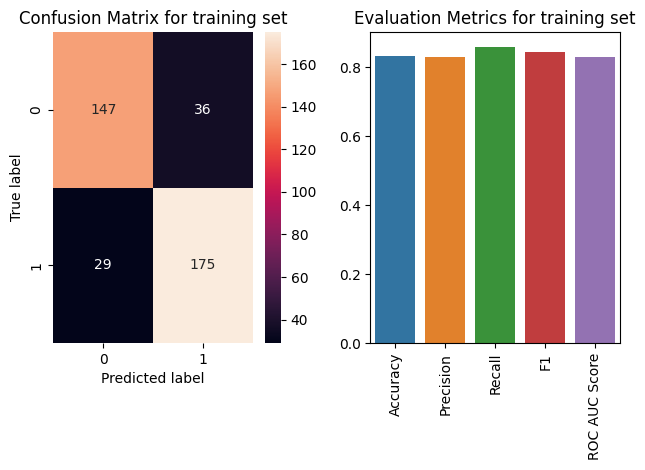

In [124]:
from xgboost import XGBClassifier

# Define hyperparameters for XGBoost
xgb_params = {
    'learning_rate': 0.1,
    'max_depth': 7,
    'n_estimators': 100,
}

# Create an XGBoost classifier with the specified hyperparameters
xgb = XGBClassifier(**xgb_params)

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tuned = xgb.predict(X_test)

# Evaluate the model using your get_metrics function
model(y_test, y_pred_tuned, "XGBClassifier With Best Parameters")

Test set evaluation result
____________________________________
XGBClassifier Evaluation Metrics:
Confusion Matrix:
[[146  37]
 [ 29 175]]
Accuracy: 0.8294573643410853
Precision: 0.8254716981132075
Recall: 0.8578431372549019
F1 Score: 0.8413461538461539
ROC AUC Score: 0.8278286724525876
____________________________________


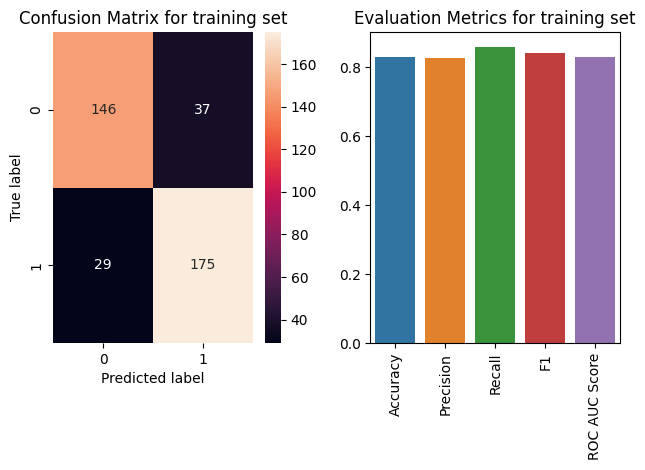

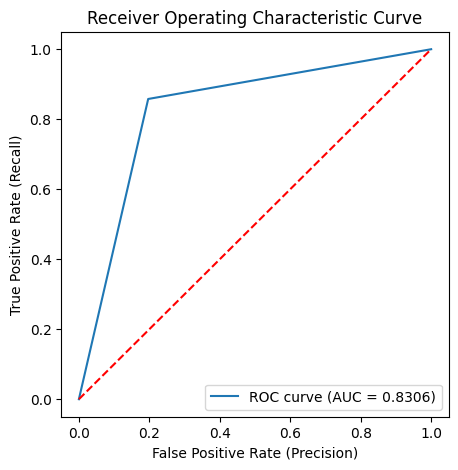

In [126]:
# Score of the model
print(f'Test set evaluation result\n____________________________________')
model(y_test, y_pred_xgb, "XGBClassifier")
# Plot roc curve for XtremeBoost Classifier
y_pred = xgb.predict(X_test)
plot_roc_curve(y_test, y_pred)

## **<u>Comparing Different Models based on the Evaluation Metrics</u>**

In [127]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have already trained and tested these models
model_names = ['Logistic_Regression', 'Decision_Tree', 'Random_Forest', 'Gradient_Boosting_Machine','XGBoost', 'K_Nearest_Neighbor', 'Naive_Bayes', 'Support_Vector_Machine', 'Neural Network']
models = [lr, dt, rf, gbm, xgb, knn, nb, svc, nn]

# Initialize lists to store metrics
Accuracy = []
Precision = []
Recall = []
F1_score = []
roc_auc_score_list = []
confusion_matrix_list = []

# Calculate metrics for each model
for model in models:
    y_pred = model.predict(X_test)  # Replace X_test with your test data
    Accuracy.append(accuracy_score(y_test, y_pred))
    Precision.append(precision_score(y_test, y_pred))
    Recall.append(recall_score(y_test, y_pred))
    F1_score.append(f1_score(y_test, y_pred))
    roc_auc_score_list.append(roc_auc_score(y_test, y_pred))
    confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

# Create a DataFrame
models_evaluation_df = pd.DataFrame({'Model': model_names, 'Accuracy': Accuracy, 'Precision': Precision,
                                     'Recall': Recall, 'F1_score': F1_score,
                                     'ROC_AUC_score': roc_auc_score_list, 'Confusion_Matrix': confusion_matrix_list})

# Display the DataFrame
print(models_evaluation_df)


                       Model  Accuracy  Precision    Recall  F1_score  \
0        Logistic_Regression  0.775194   0.777251  0.803922  0.790361   
1              Decision_Tree  0.816537   0.834171  0.813725  0.823821   
2              Random_Forest  0.819121   0.819048  0.843137  0.830918   
3  Gradient_Boosting_Machine  0.813953   0.802752  0.857843  0.829384   
4                    XGBoost  0.832041   0.829384  0.857843  0.843373   
5         K_Nearest_Neighbor  0.803618   0.780702  0.872549  0.824074   
6                Naive_Bayes  0.583979   0.558904  1.000000  0.717047   
7     Support_Vector_Machine  0.788114   0.814433  0.774510  0.793970   
8             Neural Network  0.793282   0.803922  0.803922  0.803922   

   ROC_AUC_score        Confusion_Matrix  
0       0.773545  [[136, 47], [40, 164]]  
1       0.816699  [[150, 33], [38, 166]]  
2       0.817743  [[145, 38], [32, 172]]  
3       0.811435  [[140, 43], [29, 175]]  
4       0.830561  [[147, 36], [29, 175]]  
5       0.7

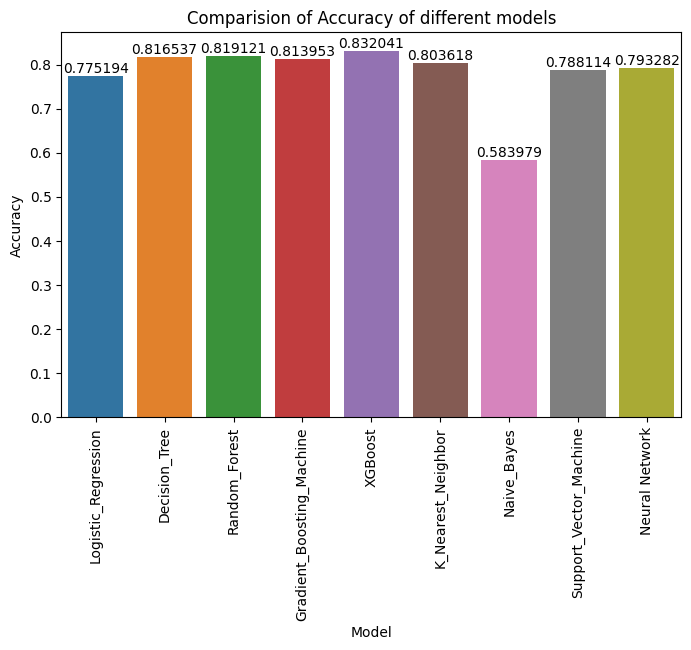

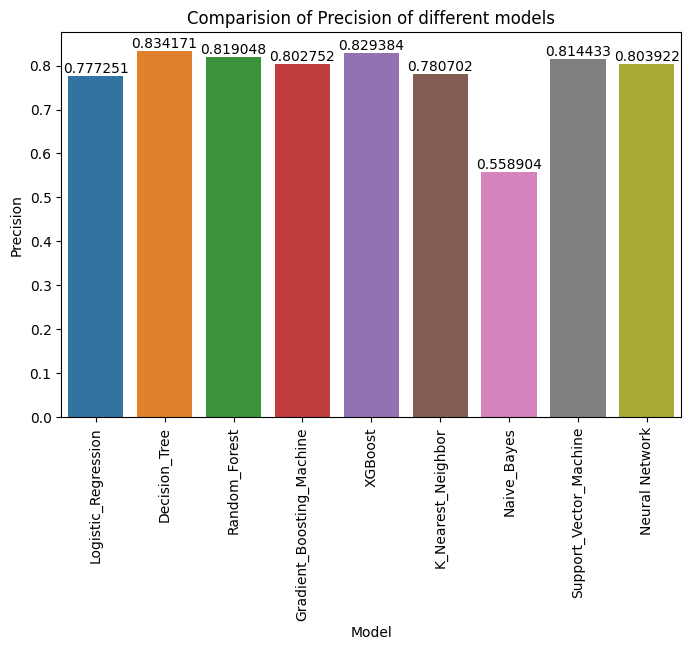

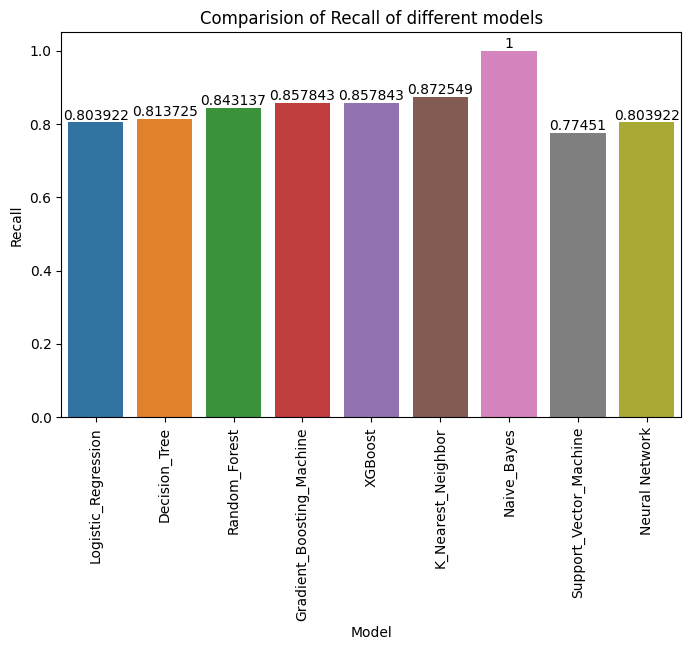

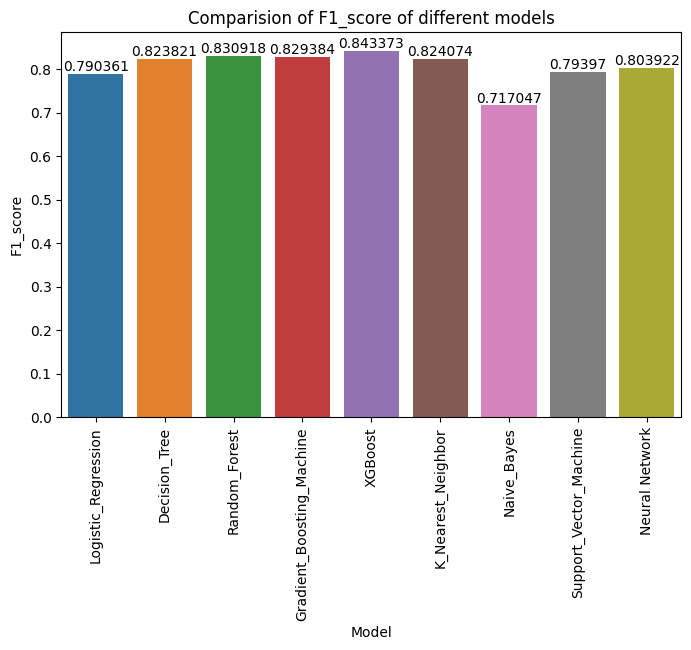

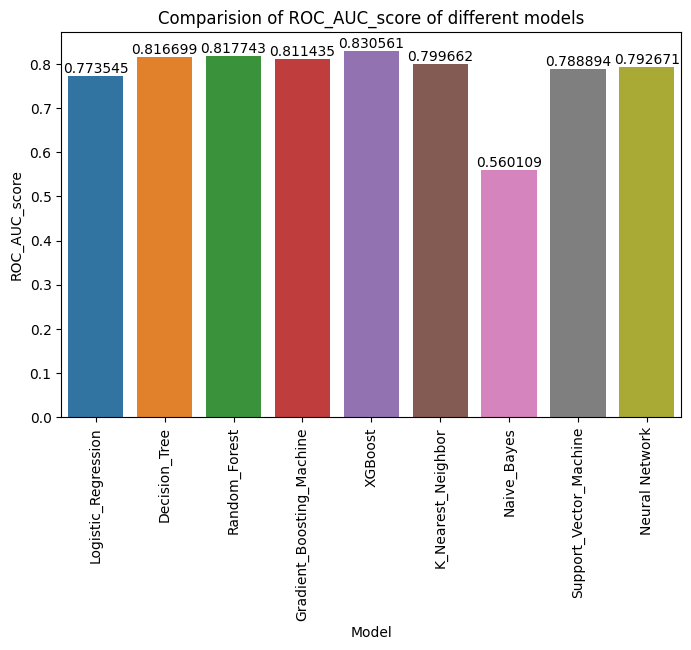

In [128]:
## Plotting bar plot to compare each evaluation metric for different models

# Defining target
col=[var for var in models_evaluation_df.columns if var not in ['Model','Confusion_Matrix']]

for var in col:
    plt.figure(figsize=(8,5))
    ax=sns.barplot(x=models_evaluation_df['Model'], y=models_evaluation_df[var])
    ax.set_title(f'Comparision of {var} of different models')
    ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=90)
    plt.show()

# **Model Explainability**

### **Feature Importance**

#### Feature Importance for XGBoost classification model

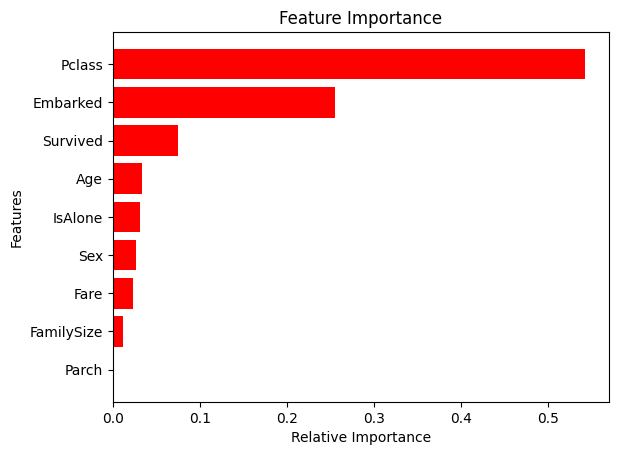

In [129]:
# Create an instance for independent feature names
features = df.columns

# Creating an object for feature importance
importances = xgb.feature_importances_
indices = np.argsort(importances)

# Plot the graph for important features
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

#### **Model Explainability for XGBoost Classification model**

In [130]:
# Install SHAP in environment
!pip install shap

Exact explainer: 388it [01:01,  4.95it/s]                         


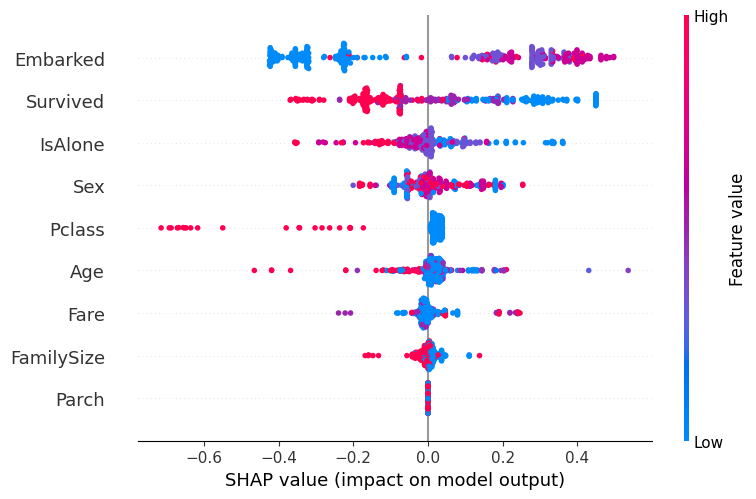

In [131]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(xgb.predict, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=df.columns)

# **<u>Conclusion </u>**

#### **<u>The following observations were made after importing and analyzing the data :</u>**

- Younger male tend to survive.

- Infants (Age <=4) had high survival rate.

- Oldest passengers (Age = 80) survived.

- A large number of passengers between 20 and 40 die.

- The age doesn't seem to have a direct impact on the female survival.

- The Chart confirms a person aboarded from C slightly more likely survived.

- The Chart confirms a person aboarded from Q more likely dead.

- The Chart confirms a person aboarded from S more likely dead.

- The Chart confirms a person aboarded with more than 2 parents or children more likely survived.

- The Chart confirms a person aboarded alone more likely dead.

- The Chart confirms Women more likely survivied than Men.

- The Chart confirms 1st class more likely survivied than other classes.

- The Chart confirms 3rd class more likely dead than other classes

- ### **The XGBoost classification model has the highest accuracy, precision, recall, and F1-score of all the models. Furthermore,XGBoost has a roc auc score of 0.83, which is very close to one, indicating that the classifier is perfectly capable of differentiating between classes.**
- ### **The XGBoost classification model trained using cross validation is the ideal model and well-trained for predicting whether the client will subscribe to a term deposit or not due to its high accuracy (0.83), precision (0.85), recall (0.83), F1 score (0.84), and rou auc score (0.83), which is close to one.**

# ***Hurrah! You have successfully completed your Machine Learning  task !!!***